# Exploring Heart Failure: Visual Insights from the Heart Disease UCI Dataset

****This notebook explores insights into heart failure using the Heart Disease UCI dataset. Through visualizations and analysis, we aim to uncover patterns and relationships among various factors such as age, sex, cholesterol levels, and other features, shedding light on potential indicators and risk factors associated with heart failure.****

# About Author

Hello everyone! Welcome to my data science notebook.
👋I'm **Motsim Aslam**, and I'm excited to have you join me on my journey of exploring and innovating in the world of data science. 📊
I'm passionate about uncovering the hidden secrets within datasets and using machine learning to make a meaningful impact. Let's dive in together and extract valuable insights!

# Connect with me

[![GitHub](https://img.shields.io/badge/GitHub-Profile-<COLOR>?style=flat-square&logo=github)](https://www.kaggle.com/motsimaslam)

[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-<COLOR>?style=flat-square&logo=kaggle)](https://www.kaggle.com/MotsimAslam)

[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-<COLOR>?style=flat-square&logo=linkedin)](https://www.linkedin.com/in/motsimaslam/)

Feel free to connect with me on GitHub, Kaggle, and LinkedIn!

![](https://th.bing.com/th/id/OIG3.XP4ceFq3tj4CvClXCZOC?pid=ImgGn)

# Introduction to the Dataset

The Heart Disease UCI dataset contains various attributes related to heart disease diagnosis. These attributes include age, sex, cholesterol levels, resting blood pressure, presence of chest pain, exercise-induced angina, and other factors. The target variable indicates the presence of heart disease. The dataset is commonly used for predictive modeling and classification tasks in machine learning.

## Introduction: Dataset Columns

1. **age**: Age of the patient
2. **sex**: Sex of the patient (1 = male; 0 = female)
3. **cp**: Chest pain type (0 = typical angina; 1 = atypical angina; 2 = non-anginal pain; 3 = asymptomatic)
4. **trestbps**: Resting blood pressure (in mm Hg)
5. **chol**: Serum cholesterol level (in mg/dl)
6. **fbs**: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7. **restecg**: Resting electrocardiographic results (0 = normal; 1 = having ST-T wave abnormality; 2 = showing probable or definite left ventricular hypertrophy)
8. **thalach**: Maximum heart rate achieved
9. **exang**: Exercise induced angina (1 = yes; 0 = no)
10. **oldpeak**: ST depression induced by exercise relative to rest
11. **slope**: Slope of the peak exercise ST segment (0 = upsloping; 1 = flat; 2 = downsloping)
12. **ca**: Number of major vessels colored by fluoroscopy (0-3)
13. **thal**: Thalassemia (0 = normal; 1 = fixed defect; 2 = reversable defect)
14. **target**: Presence of heart disease (1 = disease; 0 = no disease)


# Importing Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

# Load the Dataset

In [2]:
# Load the Heart Disease UCI dataset
heart_data = pd.read_csv('/kaggle/input/heart-disease-data/heart_disease_uci.csv')

# Summary of Dataset

In [3]:
# Displaying the first few rows of the dataset
print("First few rows of the Heart Disease UCI dataset:")
print(heart_data.head())

First few rows of the Heart Disease UCI dataset:
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             n

# Check null values


In [4]:
print("\n Checking for null values:")
print(heart_data.isnull().sum())


 Checking for null values:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [5]:
# Identify non-numeric columns
non_numeric_columns = heart_data.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_columns)

# Remove non-numeric columns before filling null values
heart_data_numeric = heart_data.drop(columns=non_numeric_columns)

# Fill null values with the median of numeric columns
heart_data_numeric.fillna(heart_data_numeric.median(), inplace=True)

# Merge back the non-numeric columns
heart_data_cleaned = pd.concat([heart_data_numeric, heart_data[non_numeric_columns]], axis=1)

# Confirm that there are no more null values
print("Null values after cleaning:", heart_data_cleaned.isnull().sum().sum())


Non-numeric columns: Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')
Null values after cleaning: 942


#  Detect outliers and show with heatmap


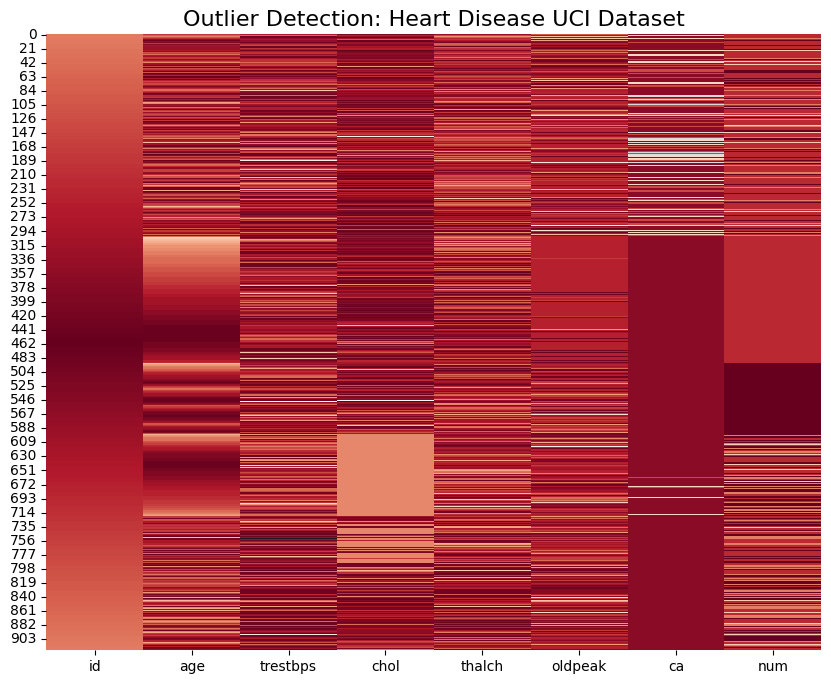

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for outlier detection
numeric_columns = heart_data_cleaned.select_dtypes(include=[np.number])

# Detect outliers using Z-score
from scipy import stats
z_scores = np.abs(stats.zscore(numeric_columns))

# Create a heatmap of Z-scores to visualize outliers
plt.figure(figsize=(10, 8))
sns.heatmap(z_scores, cmap='RdGy', cbar=False)
plt.title('Outlier Detection: Heart Disease UCI Dataset', fontsize=16)
plt.show()


# Remove outliers (Assuming Z-score method for simplicity)


In [7]:
from scipy import stats

# Set the threshold for Z-score
threshold = 3

# Identify rows with outliers
outlier_indices = np.where(np.abs(z_scores) > threshold)

# Remove rows with outliers
heart_data_cleaned_no_outliers = heart_data_cleaned.drop(outlier_indices[0])

# Display the shape of the cleaned dataset
print("Shape of the dataset after removing outliers:", heart_data_cleaned_no_outliers.shape)


Shape of the dataset after removing outliers: (884, 16)


# Exploratory Data Analysis (EDA) 📊🔍¶


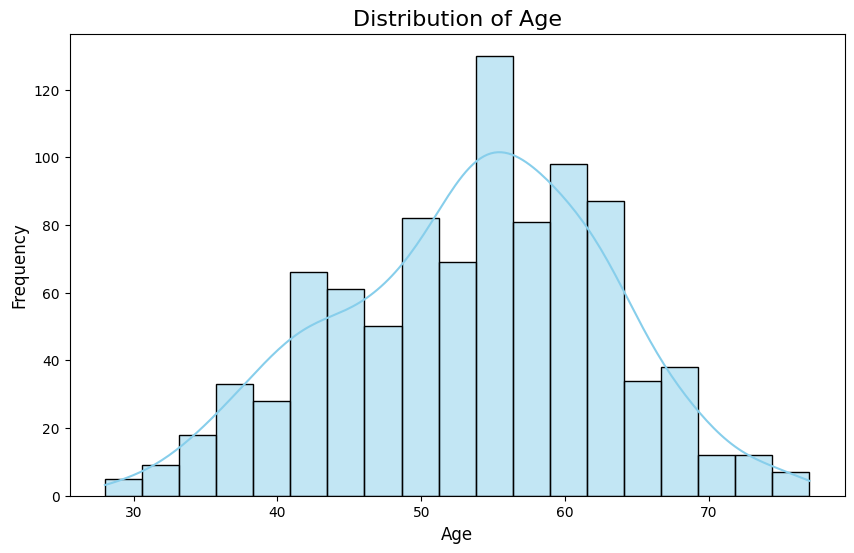

In [8]:

# Plot 1: Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(heart_data_cleaned['age'], kde=True, color='skyblue')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Age', fontsize=16)
plt.show()

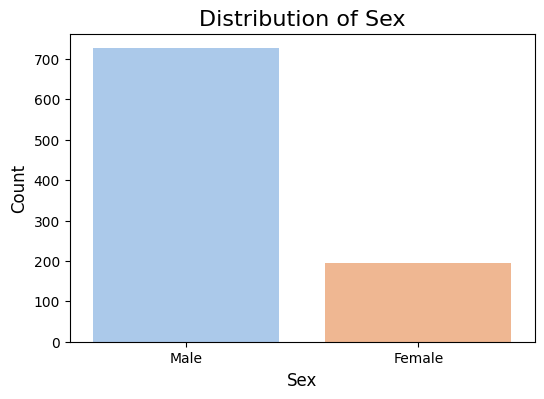

In [9]:
# Plot 2: Distribution of Sex
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=heart_data_cleaned, palette='pastel')
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Sex', fontsize=16)
plt.show()


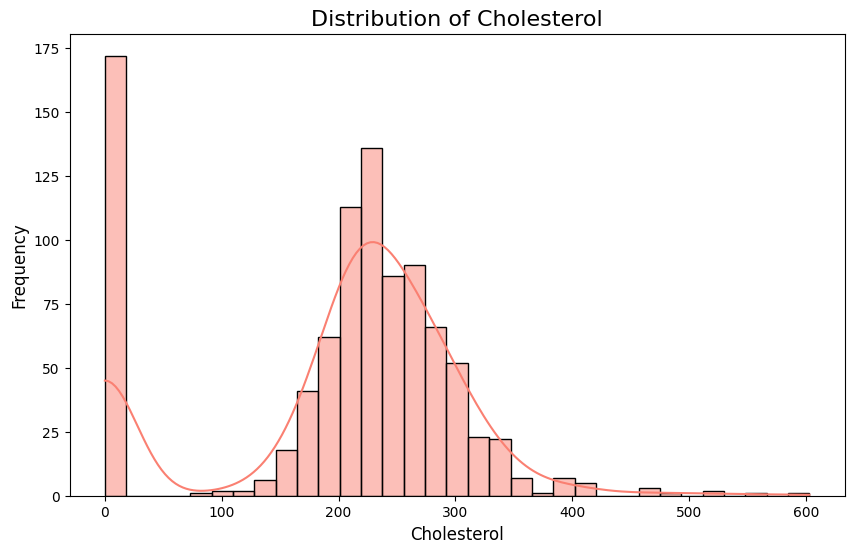

In [10]:
# Plot 3: Distribution of Cholesterol
plt.figure(figsize=(10, 6))
sns.histplot(heart_data_cleaned['chol'], kde=True, color='salmon')
plt.xlabel('Cholesterol', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Cholesterol', fontsize=16)
plt.show()


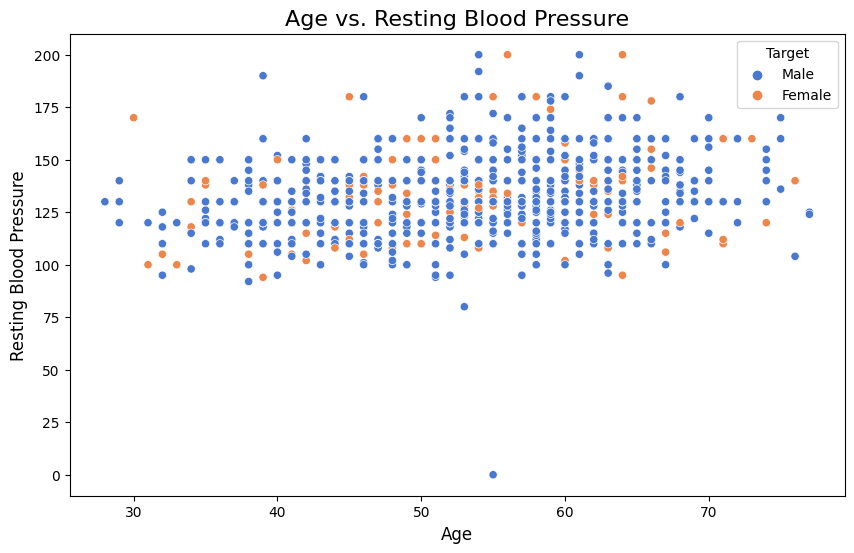

In [11]:
# Plot 4: Scatterplot of Age vs. Resting Blood Pressure
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='trestbps', data=heart_data_cleaned, hue='sex', palette='muted')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Resting Blood Pressure', fontsize=12)
plt.title('Age vs. Resting Blood Pressure', fontsize=16)
plt.legend(title='Target', loc='upper right')
plt.show()

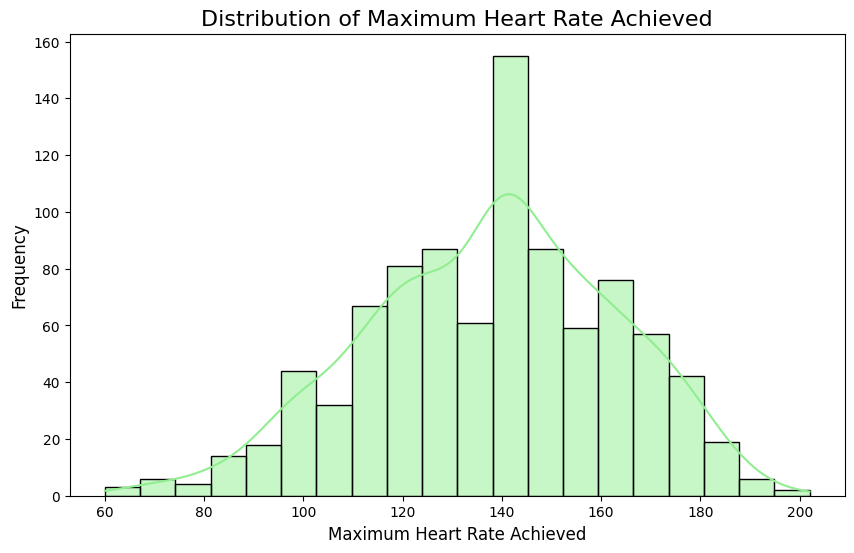

In [12]:
# Plot 5: Distribution of Maximum Heart Rate Achieved
plt.figure(figsize=(10, 6))
sns.histplot(heart_data_cleaned['thalch'], kde=True, color='lightgreen')
plt.xlabel('Maximum Heart Rate Achieved', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Maximum Heart Rate Achieved', fontsize=16)
plt.show()

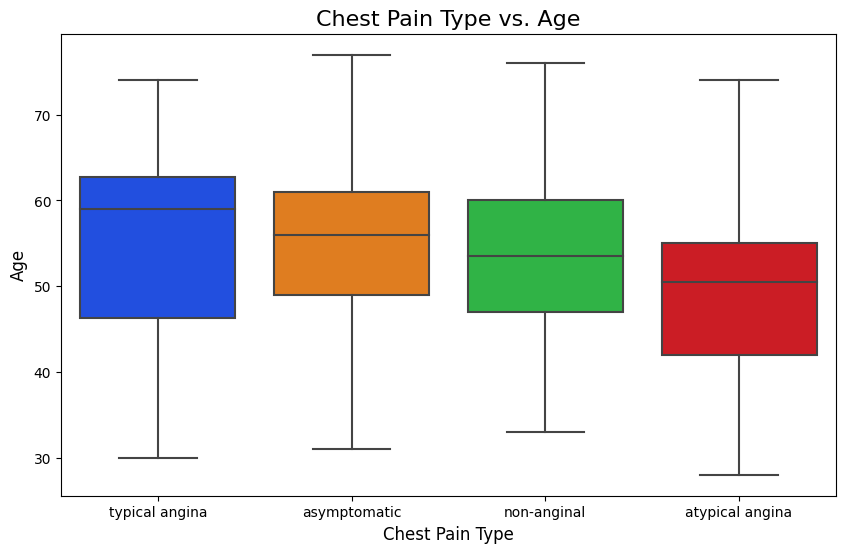

In [13]:
# Plot 6: Boxplot of Chest Pain Type vs. Age
plt.figure(figsize=(10, 6))
sns.boxplot(x='cp', y='age', data=heart_data_cleaned, palette='bright')
plt.xlabel('Chest Pain Type', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.title('Chest Pain Type vs. Age', fontsize=16)
plt.show()

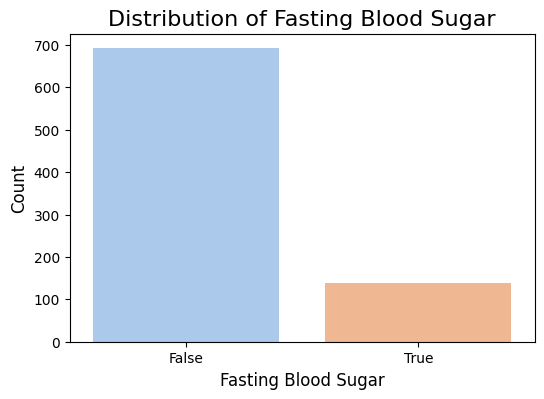

In [14]:
# Plot 7: Distribution of Fasting Blood Sugar
plt.figure(figsize=(6, 4))
sns.countplot(x='fbs', data=heart_data_cleaned, palette='pastel')
plt.xlabel('Fasting Blood Sugar', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Fasting Blood Sugar', fontsize=16)
plt.show()

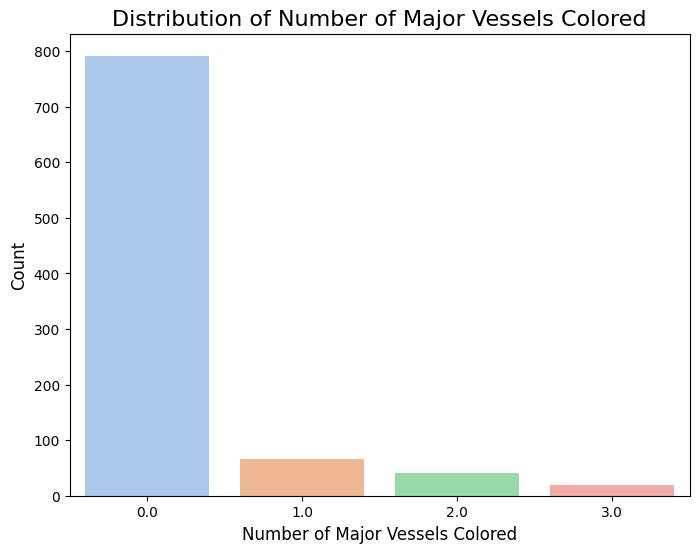

In [15]:
# Plot 8: Distribution of Number of Major Vessels Colored by Flourosopy
plt.figure(figsize=(8, 6))
sns.countplot(x='ca', data=heart_data_cleaned, palette='pastel')
plt.xlabel('Number of Major Vessels Colored', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Number of Major Vessels Colored', fontsize=16)
plt.show()

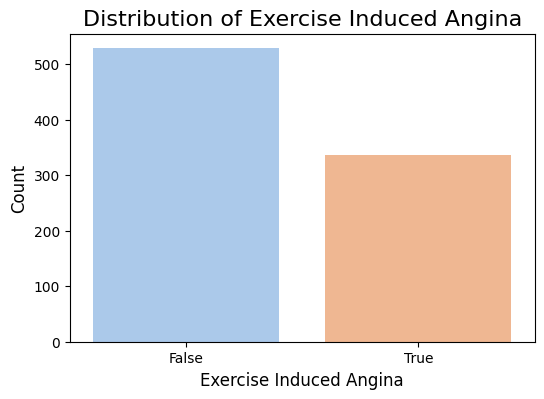

In [16]:
# Plot 9: Distribution of Exercise Induced Angina
plt.figure(figsize=(6, 4))
sns.countplot(x='exang', data=heart_data_cleaned, palette='pastel')
plt.xlabel('Exercise Induced Angina', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Exercise Induced Angina', fontsize=16)
plt.show()

In [17]:
# Select Numeric values only
numeric_col=heart_data_cleaned.select_dtypes(include=[np.number])


# To Compute Correlation matric
correlation_matrics=numeric_col.corr()
correlation_matrics

,id,age,trestbps,chol,thalch,oldpeak,ca,num
id,1.000000,0.239301,0.039382,-0.370721,-0.428727,0.014034,-0.385881,0.273552
age,0.239301,1.000000,0.230784,-0.086010,-0.349715,0.233550,0.219413,0.339596
trestbps,0.039382,0.230784,1.000000,0.089484,-0.104747,0.161217,0.039092,0.113178
chol,-0.370721,-0.086010,0.089484,1.000000,0.226047,0.047454,0.152514,-0.230539
thalch,-0.428727,-0.349715,-0.104747,0.226047,1.000000,-0.149401,0.038207,-0.349173
oldpeak,0.014034,0.233550,0.161217,0.047454,-0.149401,1.000000,0.218412,0.411588
ca,-0.385881,0.219413,0.039092,0.152514,0.038207,0.218412,1.000000,0.261797
num,0.273552,0.339596,0.113178,-0.230539,-0.349173,0.411588,0.261797,1.000000


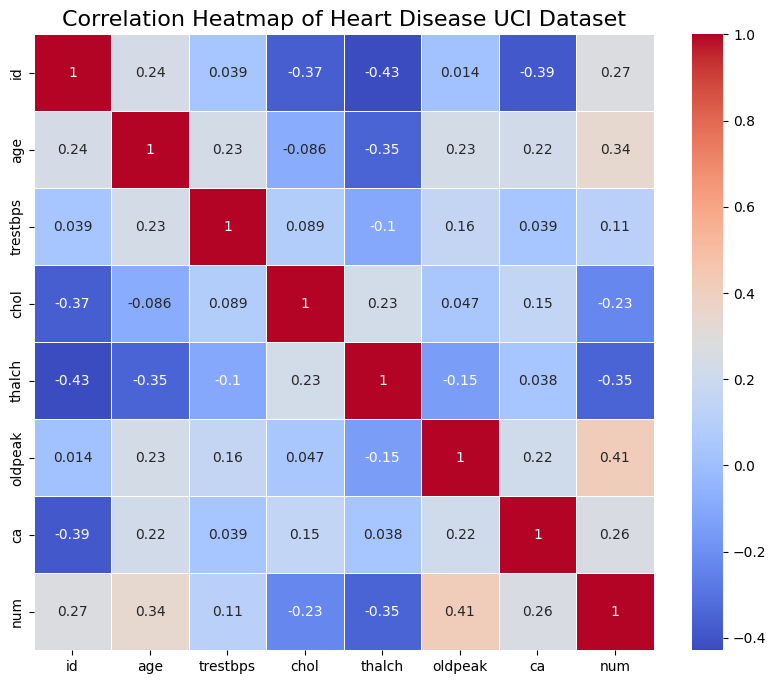

In [18]:
# Plot 10: Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrics, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Heart Disease UCI Dataset', fontsize=16)
plt.show()

# Conclusion

Through exploratory data analysis, we've gained insights into the distribution of various features in the Heart Disease UCI dataset, their relationships, and potential outliers. By removing outliers and handling missing values, we've prepared the data for further analysis and modeling.
